In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# to work with rasters
# https://rasterio.readthedocs.io/en/latest/quickstart.html#opening-a-dataset-in-reading-mode
import rasterio
from rasterio.plot import show
from rasterio.features import shapes

import pprint

## THICKENING PIXELS

In [2]:
#
def thicken_pixel(raster, i_cent,j_cent, d):
    
    i_0 = int(i_cent - ((d-1)/2))
    j_0 = int(j_cent - ((d-1)/2))

    for x in range(i_0,i_0+d):
        for y in range(j_0,j_0+d):
            if(-1<x<raster.shape[0] and -1<y<raster.shape[1]):
                if(raster[x,y] != 1):
                    raster[x,y] = 1
    return 

In [3]:
def thicken_pixels(raster,d):
    m = raster.shape[0]
    n = raster.shape[1]
    
    new_rast = np.zeros((m,n))
    
    for i in range(0,m):
        for j in range(0,n):
            if(raster[i,j] == 1):
                thicken_pixel(new_rast,i,j,d)
                
    return new_rast

## Thickening increase in aridity areas (2008 to 2019)

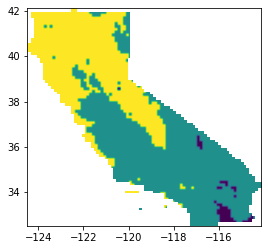

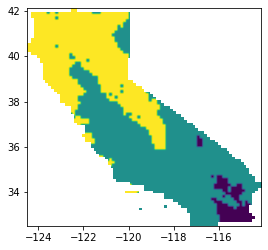

<AxesSubplot:>

In [4]:
# open and plot raster 
arid8 = rasterio.open('arid_regions_2008.tif')
arid19 = rasterio.open('arid_regions_2019.tif')

show(arid8)
show(arid19)

# desert = 1
# dry = 2
# moist = 3

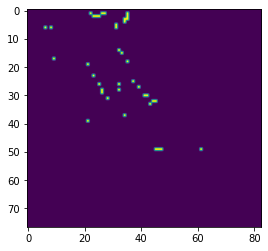

<AxesSubplot:>

In [5]:
more_arid = arid19.read(1)-arid8.read(1)
more_arid = np.where(more_arid<1,0,more_arid)
more_arid = np.where(more_arid>0,1,more_arid)
show(more_arid)
#np.unique(more_arid)

In [ ]:
for i in range(1,8):
    show(thicken_pixels(more_arid,i))

## GROUPING INTO POLYGONS

https://sgillies.net/2014/01/18/getting-shapes-of-raster-features-with-rasterio.html

In [7]:
orig_shp = shapes(more_arid, connectivity = 8)

k=0
for shape, value in orig_shp:
    k = k+1
print('# polygons', k)

# polygons 24


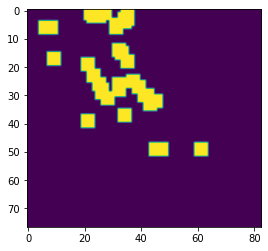

<AxesSubplot:>

In [8]:
# choose connectivity = 8
# https://samirkhanal35.medium.com/relationships-between-pixels-neighbours-and-connectivity-d38e473cd994

thick_regions = thicken_pixels(more_arid,5)
thick_regions = thick_regions.astype('int32')  # shapes function only takes certain int types
show(thick_regions)

In [9]:
thick_shp = shapes(thick_regions, connectivity = 8)
thick_shp

<generator object shapes at 0x7fbd59aeca50>

In [10]:
k = 0
for shape, value in thick_shp:
    k = k+1
#    print("Image value:")
#    print(value)
#    print("Geometry:")
#    pprint.pprint(shape)
print('# polygons', k) # k = 10 

# polygons 11


## CA subtropical_2_tropical RASTER



In [ ]:
ca_rast = rasterio.open('subtropical_2_tropical.tif')

ca_img = np.array(ca_rast.read(1))  
ca_img = np.where( ca_img<0, 0, ca_img)
ca_img = np.where( ca_img>0, 1, ca_img)
# has 2,998,608 non-zero pixels

ca_shp = shapes(ca_img, connectivity = 8) # 26 shapes

In [ ]:
k = 0
for shape, value in ca_shp:
    k = k+1
k